In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import *
import warnings
import os
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
warnings.filterwarnings('ignore')
import pickle
print("Libraries Imported")

Libraries Imported


In [290]:
# Load Data
# Download latest version
path = kagglehub.dataset_download("gurdit559/canada-per-capita-income-single-variable-data-set")
# path=r'"C:\Users\Maddox\.cache\kagglehub\datasets\gurdit559\canada-per-capita-income-single-variable-data-set\versions\1"'
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\gurdit559\canada-per-capita-income-single-variable-data-set\versions\1


In [291]:
file_path= path + '/'+ os.listdir(path)[0]
file_path

'C:\\Users\\Maddox\\.cache\\kagglehub\\datasets\\gurdit559\\canada-per-capita-income-single-variable-data-set\\versions\\1/canada_per_capita_income.csv'

In [292]:
#Read data
df=pd.read_csv(file_path)
print('Data loaded')
df.sample(2)

Data loaded


,year,per capita income (US$)
19,1989,16426.72548
40,2010,38420.52289


In [293]:
df.head(2)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935


In [294]:
df.tail(2)

,year,per capita income (US$)
45,2015,35175.18898
46,2016,34229.19363


In [295]:
df.shape

(47, 2)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


<Axes: >

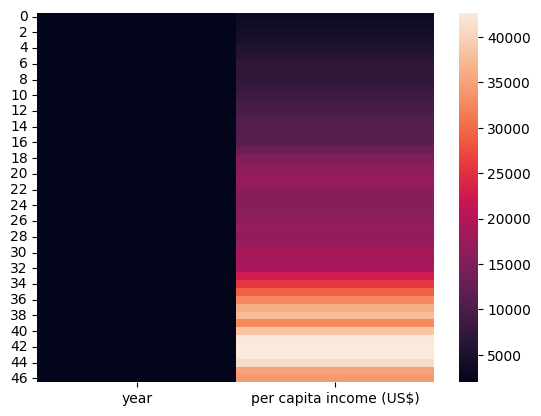

In [297]:
sns.heatmap(df)

<Axes: >

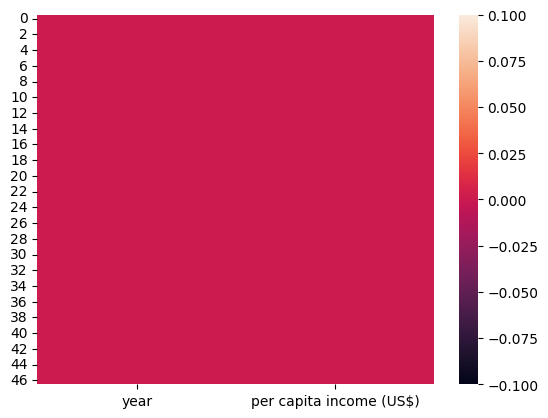

In [298]:
sns.heatmap(df.isnull())

<Axes: xlabel='year', ylabel='per capita income (US$)'>

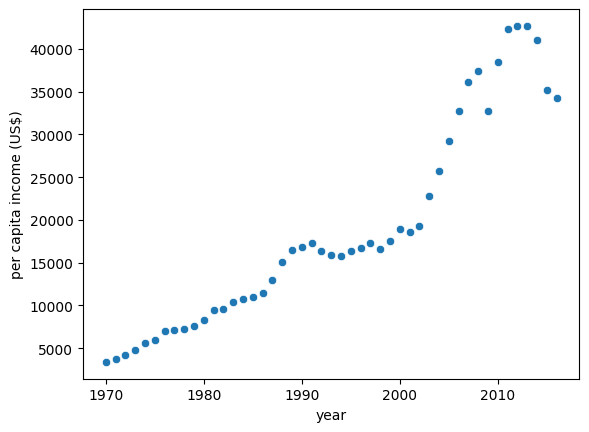

In [299]:
sns.scatterplot(data=df, x='year', y='per capita income (US$)')

In [300]:
df.corr()
#This is a positive correlation. i.e., this is a positive relation between x and y

,year,per capita income (US$)
year,1.000000,0.943884
per capita income (US$),0.943884,1.000000


In [301]:
#Data splitting for training and testing
X=df[['year']] #2D DataFrame
print(type(X))
y=df.iloc[:,1:] #1D Seriers


<class 'pandas.core.frame.DataFrame'>


In [302]:
model=LinearRegression()
model.fit(X,y) #Hyper parameters: Model fine tuning
#This isd the concept of overfitting and underfitting

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [303]:
year=[[2017]]

capita=round(model.predict(year)[0][0],2)

print(f"Predicted GDP per capita of Canda in the year {year[0][0]} is {capita}")

Predicted GDP per capita of Canda in the year 2017 is 38803.3


In [304]:
y_pred = model.predict(X)

mse = mean_absolute_error(df['per capita income (US$)'], y_pred)
print("Mean Absolute Error:", mse)

mae = mean_squared_error(df['per capita income (US$)'], y_pred)
print(f"Mean Square Error: {mae}")

rmse = root_mean_squared_error(df['per capita income (US$)'], y_pred)
print(f"Root Mean Square Error: {rmse}")

Mean Absolute Error: 3088.866427771443
Mean Square Error: 15462739.061504772
Root Mean Square Error: 3932.268945723928


In [305]:
df['y_pred']=y_pred
df.sample(2)

,year,per capita income (US$),y_pred
27,1997,17310.75775,22233.997364
31,2001,18601.39724,25547.857665


In [306]:
print(f"Manual MAE: {(df['per capita income (US$)']-df['y_pred']).abs().mean()}")
print(f"Manual MSE: {((df['per capita income (US$)']-df['y_pred'])**2).mean()}")
print(f"Manual RMSE: {(((df['per capita income (US$)']-df['y_pred'])**2).mean())**0.5}")

Manual MAE: 3088.866427771443
Manual MSE: 15462739.061504772
Manual RMSE: 3932.268945723928


Checking Model Score

In [307]:
score=model.score(X,y)
print(f'Model Score is: {score}')
# it predict the value first from 'X' and then compare the predicted value with the
# actual value from 'y'

Model Score is: 0.890916917957032


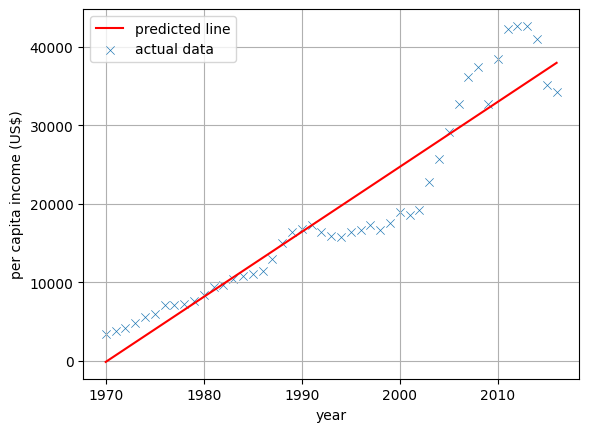

In [308]:
plt.plot(X,y_pred, color='red', label='predicted line')
sns.scatterplot(data=df, x='year', y='per capita income (US$)', label='actual data', marker='x')
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='year', ylabel='per capita income (US$)'>

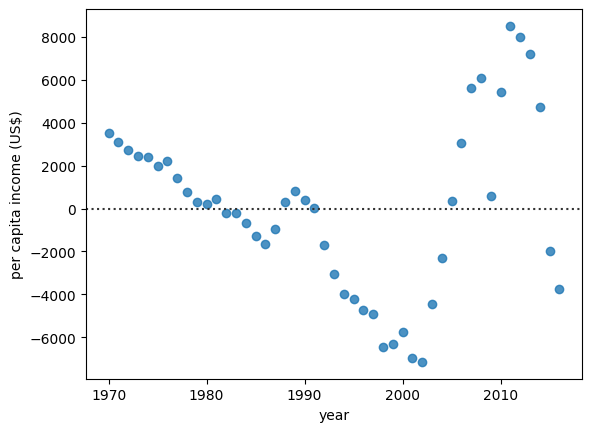

In [309]:
sns.residplot(data=df, x=X, y=y)
#This graph shows the difference between actual value and predicted value

In [ ]:
pickle.dump(model,open('capita_pred.pkl','wb'))
print('Model saved')

Model saved
